In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [53]:
df = pd.read_csv('all_data.csv')

In [8]:
df.columns

Index(['Unnamed: 0', 'Date', 'Ticker', 'Adj_Close', 'Close', 'High', 'Low',
       'Open', 'Volume', '__index_level_0__', 'Symbol', 'Name', 'Sector',
       'Price', 'Price_Earnings', 'Dividend_Yield', 'Earnings_Share',
       'Market_Cap', 'EBITDA', 'Price_Sales', 'Price_Book', 'SEC_Filings'],
      dtype='object')

In [54]:
df = df.drop('Unnamed: 0', axis=1)

In [55]:
df = df.drop('__index_level_0__', axis=1)

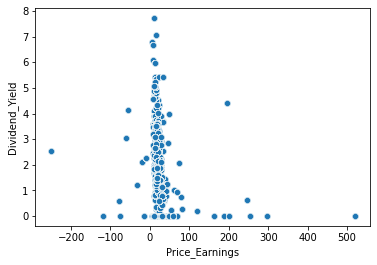

In [13]:
sns.scatterplot(data=df, x='Price_Earnings', y='Dividend_Yield')

In [19]:
neg_pe = df[df['Price_Earnings'] < -100]
neg_pe = neg_pe.drop_duplicates(subset=['Ticker'])
neg_pe

,Date,Ticker,Adj_Close,Close,High,Low,Open,Volume,Symbol,Name,Sector,Price,Price_Earnings,Dividend_Yield,Earnings_Share,Market_Cap,EBITDA,Price_Sales,Price_Book,SEC_Filings
54213,2019-01-02,APA,25.669788,27.110001,27.580000,25.590000,25.610001,4629400.0,APA,Apache Corporation,Energy,37.73,-251.53,2.528445,-3.72,1.506628e+10,3.265000e+09,3.651366,2.22,http://www.sec.gov/cgi-bin/browse-edgar?action...
253983,2019-01-02,INCY,63.560001,63.560001,64.970001,62.029999,62.490002,1429600.0,INCY,Incyte,Health Care,83.92,-119.89,0.000000,0.54,1.822096e+10,-8.168600e+07,17.026990,10.25,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [33]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.head()

,Date,Ticker,Adj_Close,Close,High,Low,Open,Volume,Symbol,Name,Sector,Price,Price_Earnings,Dividend_Yield,Earnings_Share,Market_Cap,EBITDA,Price_Sales,Price_Book,SEC_Filings
0,2019-01-02,A,64.427048,65.690002,66.570000,65.300003,66.500000,2113300.0,A,Agilent Technologies Inc,Health Care,65.05,27.45,0.875698,2.1,2.198461e+10,1.094000e+09,6.493563,4.56,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,2019-01-03,A,62.053570,63.270000,65.779999,62.000000,65.529999,5383900.0,A,Agilent Technologies Inc,Health Care,65.05,27.45,0.875698,2.1,2.198461e+10,1.094000e+09,6.493563,4.56,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,2019-01-04,A,64.201469,65.459999,65.949997,64.089996,64.089996,3123700.0,A,Agilent Technologies Inc,Health Care,65.05,27.45,0.875698,2.1,2.198461e+10,1.094000e+09,6.493563,4.56,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,2019-01-07,A,65.564735,66.849998,67.430000,65.610001,65.639999,3235100.0,A,Agilent Technologies Inc,Health Care,65.05,27.45,0.875698,2.1,2.198461e+10,1.094000e+09,6.493563,4.56,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,2019-01-08,A,66.525894,67.830002,68.209999,66.699997,67.589996,1578100.0,A,Agilent Technologies Inc,Health Care,65.05,27.45,0.875698,2.1,2.198461e+10,1.094000e+09,6.493563,4.56,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [51]:
from sklearn import preprocessing

x = df['Adj_Close'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

ValueError: ignored

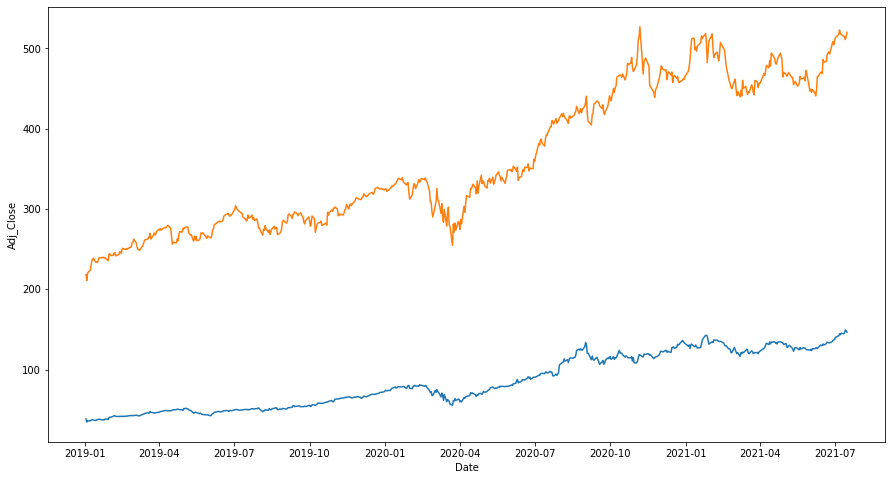

In [48]:
plt.figure(figsize = (15,8))
sns.lineplot(data=df[df['Ticker'] == 'AAPL'], x='Date', y='Adj_Close')
sns.lineplot(data=df[df['Ticker'] == 'TMO'], x='Date', y='Adj_Close')

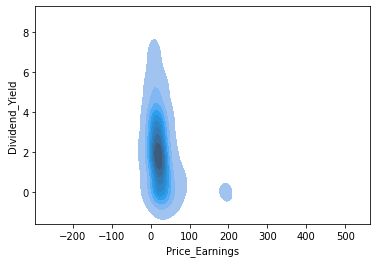

In [58]:
sns.kdeplot(data=df.drop_duplicates(subset=['Ticker']), x='Price_Earnings', y='Dividend_Yield', shade=True)